## 1) Library & Data Import

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
csvPath = '/content/drive/MyDrive/[2022]AICE자격증반/AICE예제/example1/data/BostonHousing2.csv'
df = pd.read_csv(csvPath)

In [5]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


#### Feature Description
- TOWN : 지역 이름
- LON, LAT : 위도, 경도 정보
- **CMEDV : 해당 지역의 집값(중간값)**
- CRIM : 근방 범죄율
- ZN : 주택지 비율
- INDUS : 상업적 비즈니스에 활용되지 않는 농지 면적
- CHAS : 경계선에 강에 있는지 여부
- NOX : 산화 질소 농도
- RM : 자택당 평균 방 갯수
- AGE : 1940 년 이전에 건설된 비율
- DIS : 5 개의 보스턴 고용 센터와의 거리에 다른 가중치 부여
- RAD : radial 고속도로와의 접근성 지수
- TAX : 10000달러당 재산세
- PTRATIO : 지역별 학생-교사 비율
- B : 지역의 흑인 지수 (1000(B - 0.63)^2), B는 흑인의 비율.
- LSTAT : 빈곤층의 비율

-----

## 2) EDA (Exploratory Data Analysis : 탐색적 데이터 분석)

### 2-1) 회귀 분석 종속(목표) 변수 탐색

##### 데이터셋 기본 정보 탐색

In [6]:
# 행 506, 컬럼 17(1개는 레이블)
df.shape

(506, 17)

In [8]:
# null데이터가 있는지 확인
# null데이터의 갯수 확인
df.isnull().sum()

TOWN       0
LON        0
LAT        0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [9]:
# 컬럼의 갯수, 결측치의 갯수, 데이터 타입
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


##### 'CMEDV' 피처 탐색

In [11]:
# 'CMEDV'컬럼의 통계치를 확인
df['CMEDV'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

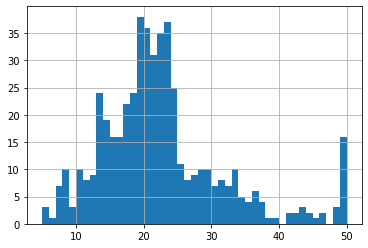

In [15]:
# 'CMEDV'컬럼의 히스토그램을 그려보자.
df['CMEDV'].hist(bins=45)

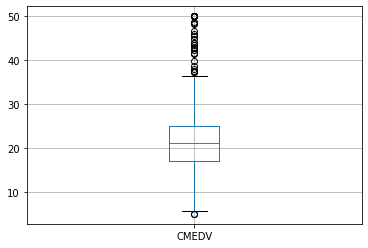

In [18]:
df.boxplot(column=['CMEDV'])

-----

### 2-2) 회귀 분석 설명 변수 탐색

##### 설명 변수들의 분포 탐색

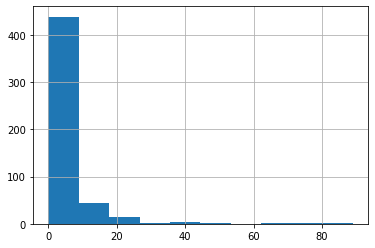

In [24]:
df['CRIM'].hist(bins=10)

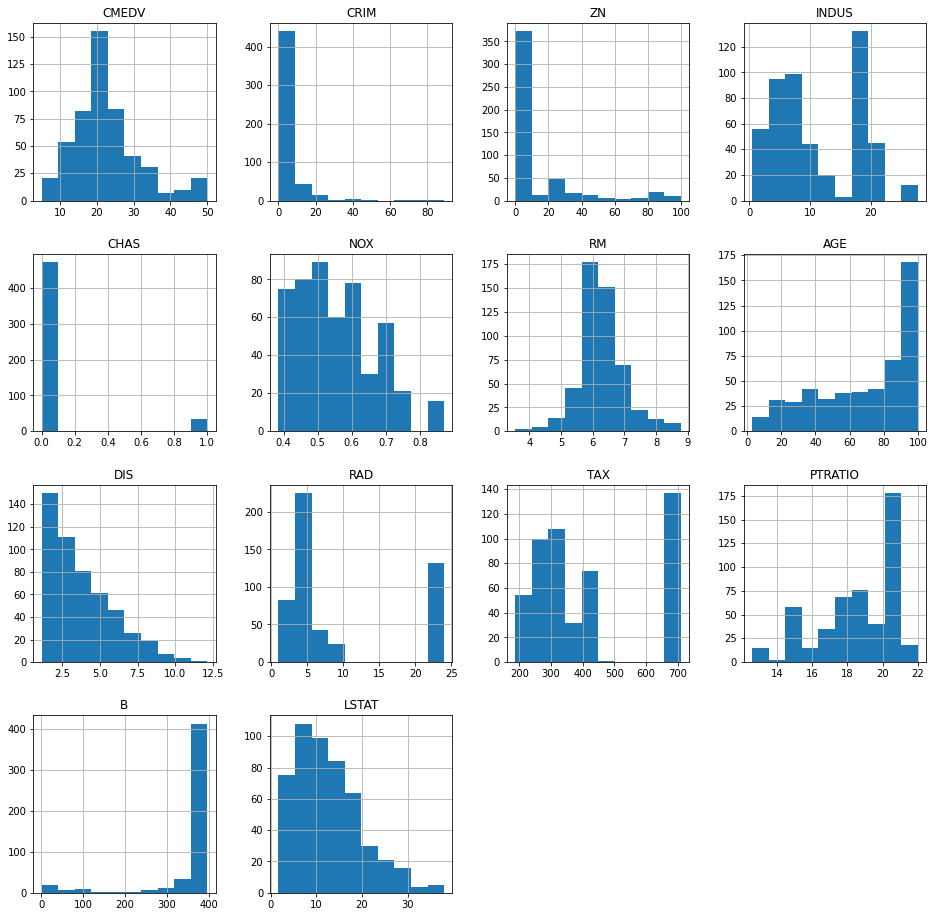

In [32]:
# 그래프로 출력하려면 수치 데이터(numerical columns)를 리스트로 생성
#numerical_columns = df.select_dtypes(include='number')
numerical_columns = ['CMEDV','CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                     'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 
                     'B', 'LSTAT']

# 캔버스를 생성
fig = plt.figure(figsize=(16,16))
# numerical_columns리스트안에 있는 항목(컬럼)들을 하나씩 가져와서 
# 히스토그램을 여러개 한번에 그릴때 활용
ax = fig.gca()

df[numerical_columns].hist(ax=ax)
plt.show()

##### 설명 변수들의 상관관계 탐색

In [35]:
# 집값을 예측하는게 모델의 목적인데
# 집값을 예측하는데 도움이되는 컬럼 데이터는 어떤 것인가?
# 상관관계 계수를 통해 계수가 높으면 직접적으로 도움이 된다.
corr = df[numerical_columns].corr()

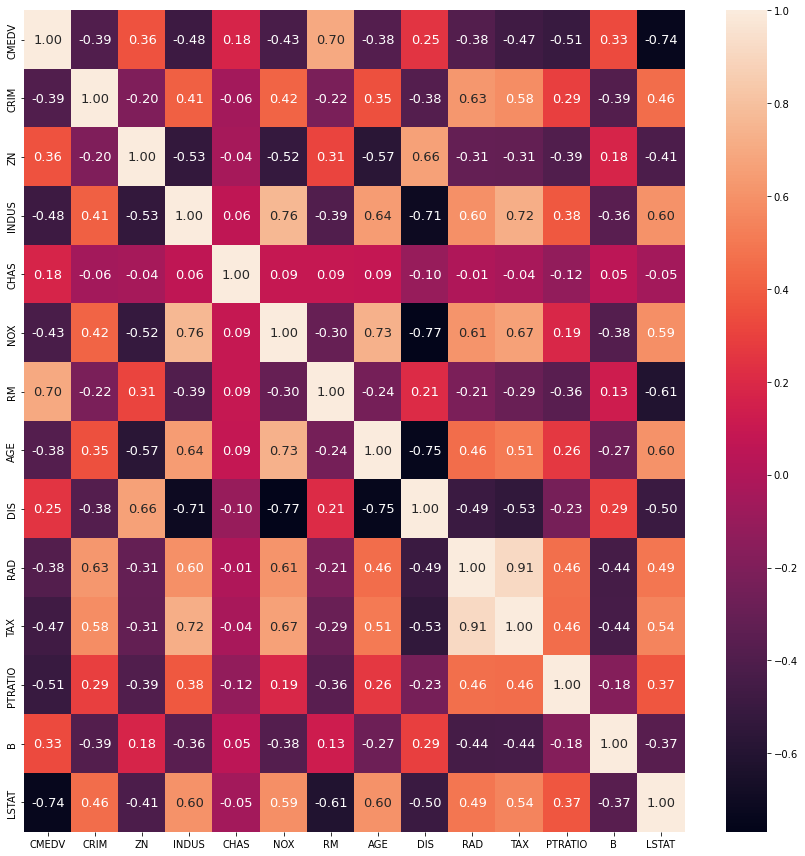

In [45]:
# seaborn의 heatmap을 사용하면 시각화에 도움이 된다.
fig = plt.figure(figsize=(12,12))
ax=fig.gca()

heatmap = sns.heatmap(corr.values,
                      # annot=True로 변경해줘야 숫자값을 확인할 수 있다.
                      annot=True,
                      fmt='.2f',
                      annot_kws={'size':12},
                      yticklabels=numerical_columns,
                      xticklabels=numerical_columns,                     
                      ax=ax) 
plt.tight_layout()
plt.show()

##### 설명 변수와 종속 변수의 관계 탐색

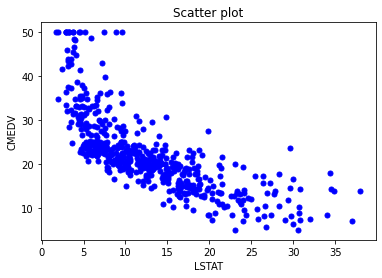

In [49]:
plt.plot('LSTAT', 'CMEDV',
         data=df,
         linestyle='none',
         marker='o',
         markersize=5,
         color='blue')
plt.title('Scatter plot')
plt.xlabel('LSTAT')
plt.ylabel('CMEDV')
plt.show()

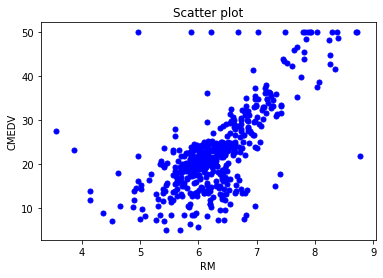

In [58]:
plt.plot('RM', 'CMEDV',
         data=df,
         linestyle='none',
         marker='o',
         markersize=5,
         color='blue')
plt.title('Scatter plot')
plt.xlabel('RM')
plt.ylabel('CMEDV')
plt.show()

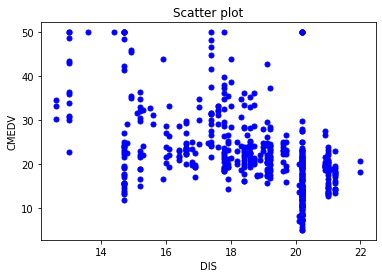

In [53]:
# PTRATIO는 corr()함수를 통해 
# -0.51의 상관계수를 갖음을 확인할 수 있다.
# 하지만 -0.51정도로는 상관관계를 명확하게 해석하기 어렵다.
plt.plot('PTRATIO', 'CMEDV',
         data=df,
         linestyle='none',
         marker='o',
         markersize=5,
         color='blue')
plt.title('Scatter plot')
plt.xlabel('PTRATIO')
plt.ylabel('CMEDV')
plt.show()

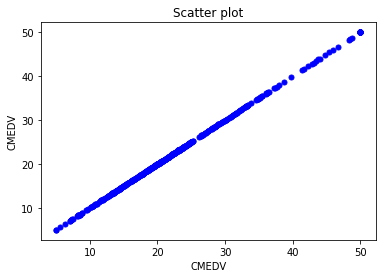

In [57]:
# 두 값의 상관계수가 0.65
plt.plot('CMEDV', 'CMEDV',
         data=df,
         linestyle='none',
         marker='o',
         markersize=5,
         color='blue')
plt.title('Scatter plot')
plt.xlabel('CMEDV')
plt.ylabel('CMEDV')
plt.show()

##### 지역별 차이 탐색

In [60]:
# 'TOWN'의 고유한 이름의 갯수가 92
print(df['TOWN'].unique())
print(len(df['TOWN'].unique()))

['Nahant' 'Swampscott' 'Marblehead' 'Salem' 'Lynn' 'Sargus' 'Lynnfield'
 'Peabody' 'Danvers' 'Middleton' 'Topsfield' 'Hamilton' 'Wenham' 'Beverly'
 'Manchester' 'North Reading' 'Wilmington' 'Burlington' 'Woburn' 'Reading'
 'Wakefield' 'Melrose' 'Stoneham' 'Winchester' 'Medford' 'Malden'
 'Everett' 'Somerville' 'Cambridge' 'Arlington' 'Belmont' 'Lexington'
 'Bedford' 'Lincoln' 'Concord' 'Sudbury' 'Wayland' 'Weston' 'Waltham'
 'Watertown' 'Newton' 'Natick' 'Framingham' 'Ashland' 'Sherborn'
 'Brookline' 'Dedham' 'Needham' 'Wellesley' 'Dover' 'Medfield' 'Millis'
 'Norfolk' 'Walpole' 'Westwood' 'Norwood' 'Sharon' 'Canton' 'Milton'
 'Quincy' 'Braintree' 'Randolph' 'Holbrook' 'Weymouth' 'Cohasset' 'Hull'
 'Hingham' 'Rockland' 'Hanover' 'Norwell' 'Scituate' 'Marshfield'
 'Duxbury' 'Pembroke' 'Boston Allston-Brighton' 'Boston Back Bay'
 'Boston Beacon Hill' 'Boston North End' 'Boston Charlestown'
 'Boston East Boston' 'Boston South Boston' 'Boston Downtown'
 'Boston Roxbury' 'Boston Savin Hill'

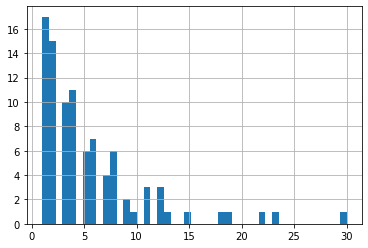

In [62]:
df['TOWN'].value_counts().hist(bins=45)

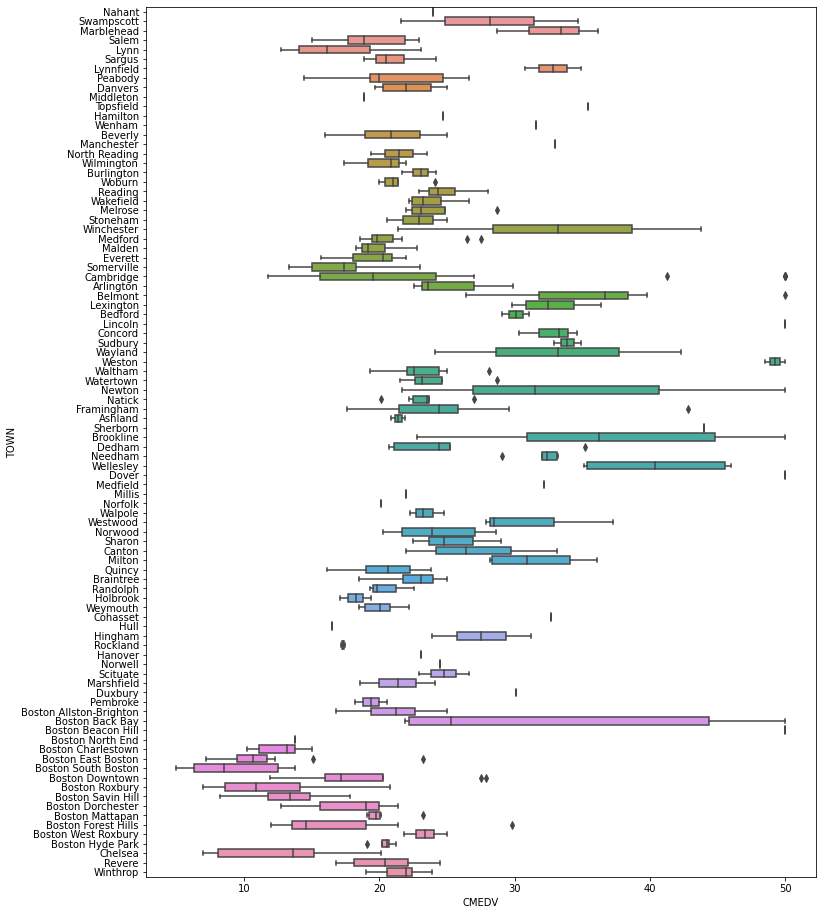

In [64]:
# 'TOWN'별로 가격의 평균값과 편차 어떤지 확인
fig = plt.figure(figsize=(12,16))
# gca함수는 리스트를 그래프로 출력할때 사용
ax=fig.gca()
sns.boxplot(x='CMEDV', y='TOWN', data=df, ax=ax)

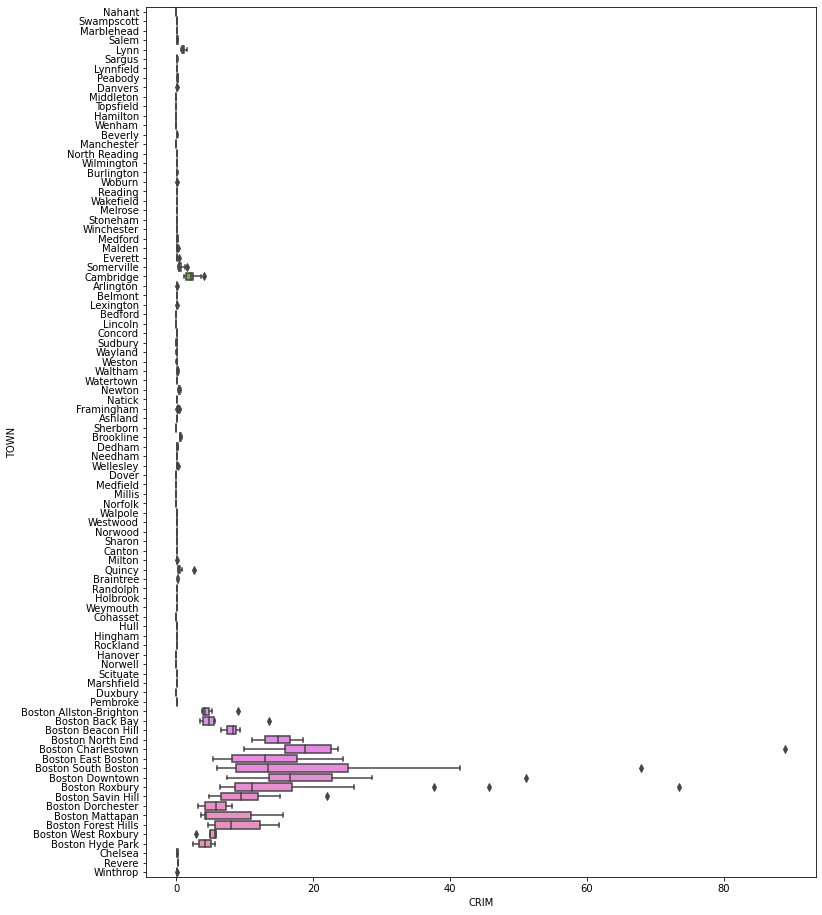

In [65]:
# 'TOWN'별로 범죄율과 편차 어떤지 확인
fig = plt.figure(figsize=(12,16))
# gca함수는 리스트를 그래프로 출력할때 사용
ax=fig.gca()
sns.boxplot(x='CRIM', y='TOWN', data=df, ax=ax)

-----

## 3) 집값 예측 분석 : 회귀분석

### 3-1) 데이터 전처리

##### 피처 표준화
##### 문제 : 주어진 Feature데이터를 표준화하시오

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 컬럼중에 수치 데이터, 상관계수가 높은 것을 우선으로 컬럼을 정리 (12개로 정리)
scaler_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df[scaler_columns] = scaler.fit_transform(df[scaler_columns])

### StandardScaler를 사용할 때 : 이상치가 상대적으로 많을 때는 MinmaxScaler보다는 StandardScaler가 낫다.


In [68]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,Swampscott,-70.950,42.2875,21.6,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,Swampscott,-70.936,42.2830,34.7,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,Marblehead,-70.928,42.2930,33.4,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,Marblehead,-70.922,42.2980,36.2,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


##### 데이터셋 분리

In [70]:
from sklearn.model_selection import train_test_split

# 표준를 거친 데이터를 X로 사용
X = df[scaler_columns]
# csv에서 주어지는 데이터를 레이블값으로 사용
y = df['CMEDV']

# 8:2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 12), (102, 12), (404,), (102,))

-----

### 3-2) 회귀 분석 모델 학습

In [71]:
# 선형 회귀 모델을 사용
from sklearn.linear_model import LinearRegression

# step 1. 선형모델 객체 생성
model = LinearRegression()

# step 2. 모델학습(훈련데이터)
linear_reg = model.fit(x_train, y_train)

# step 3. 학습된 계숙 확인
print(linear_reg.coef_)
print(linear_reg.intercept_)

[-0.84566817  1.1468718   0.50073531 -1.74223245  3.03604272 -0.02845815
 -2.93632828  2.49622646 -2.2675522  -1.93710387  0.67158989 -3.94672609]
22.505653322588387


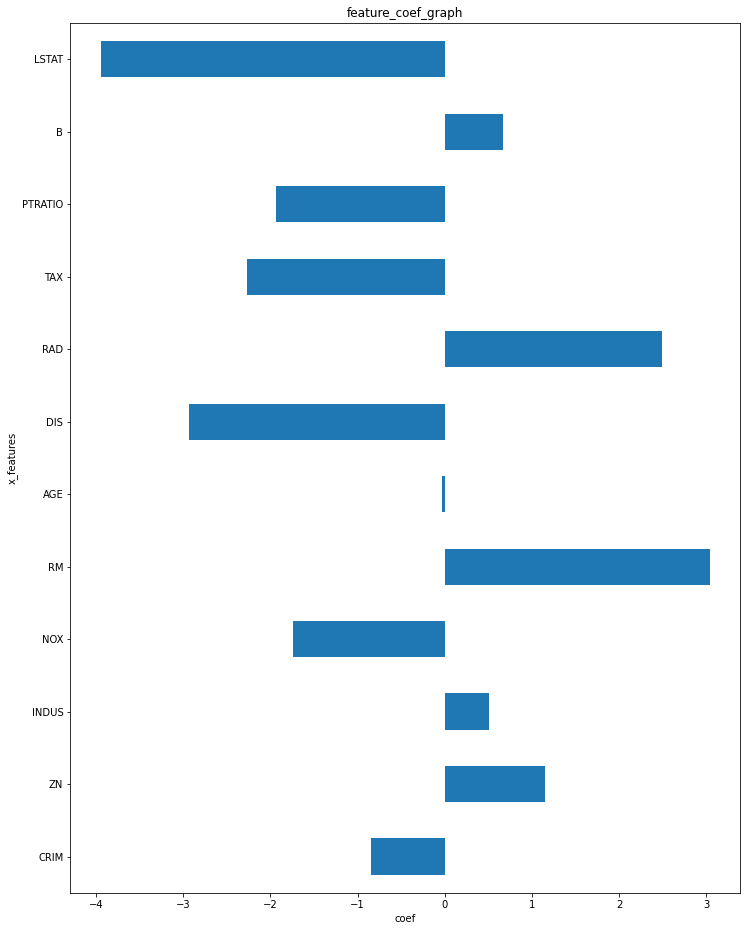

In [74]:
# figure size
plt.rcParams['figure.figsize'] = [12, 16]

# graph values
coefs = linear_reg.coef_.tolist()
coefs_series = pd.Series(coefs)

# graph info
x_labels = scaler_columns
ax = coefs_series.plot.barh()
ax.set_title('feature_coef_graph')
ax.set_xlabel('coef')
ax.set_ylabel('x_features')
ax.set_yticklabels(x_labels)
plt.show()

In [75]:
# step 4. 예측(추론) : r2 score 상관값을 제곱한 값
linear_reg.score(x_test, y_test)

0.6436118266113686

-----

### 3-3) 학습 결과 해석

##### R2 score, RMSE score 계산

##### 피처 유의성 검정

##### 다중 공선성